In [1]:
# import libraries
import string as st
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# input params 
num_itr = 4  # Number of iterations
sim_time = 500001  # in ps (fixed for each simulation)
time = np.arange(sim_time)*1e-3 # in ns
kt = 0.794882  # in kcal/mol unit 

In [3]:
# load colvar data 

# initialize 
zeta_data = np.empty([sim_time, num_itr])
ld1_data = np.empty([sim_time, num_itr])
rbias_data = np.empty([sim_time, num_itr])
ld1_fes_data = []

for i in range(num_itr):
    path = "itr_%d"%(i+1)
    zeta_data[:,i] = np.loadtxt(path+"/zeta.txt")
    ld1_data[:,i], rbias_data[:,i] = np.loadtxt(path+"/COLVAR", usecols=(1,3), unpack=True)
    ld1_fes = np.loadtxt(path+"/fe_vs_ld1.txt", usecols=(0,1))
    ld1_fes_data.append(ld1_fes)
    
wgts_data = np.exp(rbias_data/kt)

# load zeta data from 4.5us long unbiased MD simulation
zeta_ref = []
path_to_ref = "/scratch/projects/hockygroup/ss12902/iterative_lda/aib9_5us_cmd_run/"
files = ["zeta_1500ns.txt", "zeta_3000ns.txt", "zeta_4500ns.txt"] 
for i in range(3):
    if i == 0:
        x = np.loadtxt(path_to_ref+files[i], usecols=1)
    else:
        x = np.loadtxt(path_to_ref+files[i], usecols=1, skiprows=2)
    zeta_ref.append(x)
zeta_ref = np.concatenate(zeta_ref, axis=0)
print(zeta_ref.shape)

(4500001,)


### MT figure : Aib$_9$ : $\zeta$ vs. Time

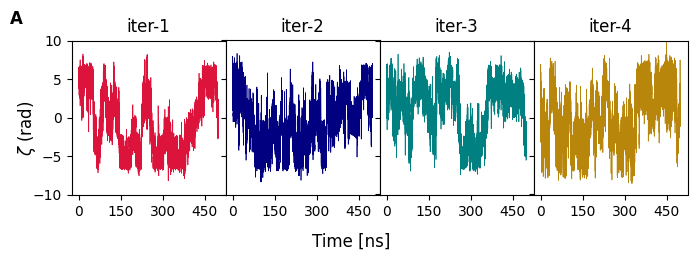

In [4]:
# make the zeta vs. time plot
colors = ['crimson', 'navy', 'teal', 'darkgoldenrod']
fig, axs = plt.subplots(1, 4, figsize=(7,2.5), sharex=True, sharey=True)
axs = axs.reshape([-1])

# 1st row 
axs[0].set_xticks(np.arange(0,600, 150))
axs[0].set_yticks(np.arange(-10, 15, 5))
axs[0].set_ylim(-10,10)
axs[0].text(-0.40, 1.2, st.ascii_uppercase[0], fontweight='bold', transform=axs[0].transAxes, fontsize=12, va='top')

for i in range(num_itr):
    axs[i].set_box_aspect(1)
    axs[i].set_title("iter-%d"%(i+1))
    axs[i].plot(time, zeta_data[:,i], color=colors[i], lw=0.5, alpha=1)
    
fig.supxlabel("Time [ns]")
fig.supylabel("$\zeta$ (rad)")
fig.subplots_adjust(wspace=0.0, bottom=0.1, right=0.98, left=0.10, top=0.98)

# save
plt.savefig("zeta_vs_time.pdf", format="pdf")

### MT figure : Aib$_9$ : FES vs. $\zeta$ 

/state/partition1/job-58491364/ipykernel_1433110/893621960.py:13: RuntimeWarning: divide by zero encountered in log
  fe = -kt*np.log(hist)


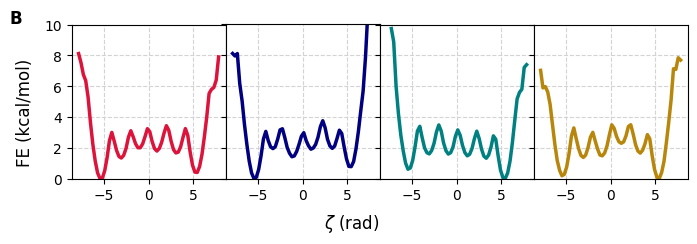

In [5]:
fig, axs = plt.subplots(1, num_itr, figsize=(7,2.5), sharex=True, sharey=True)

fig.supxlabel("$\zeta$ (rad)")
fig.supylabel("FE (kcal/mol)")

axs[0].set_xticks([-5,0,5])
axs[0].set_ylim(0,10)
axs[0].text(-0.4, 1.1, st.ascii_uppercase[1], transform=axs[0].transAxes, fontweight='bold', fontsize=12, va='top')

for i in range(num_itr):
    hist, edges = np.histogram(zeta_data[:,i], range=[-8,8], bins=60, density=True, weights=wgts_data[:,i])
    bins = (edges[1:]+edges[:-1])/2
    fe = -kt*np.log(hist)
    fe -= fe.min()
    
    axs[i].set_box_aspect(1)
    axs[i].grid(axis='both', which='major', linestyle='--', color='lightgrey')
    axs[i].plot(bins, fe, color=colors[i], label="iter-%d"%(i+1), lw=2.5, alpha=1)

fig.subplots_adjust(wspace=0.0, bottom=0.1, right=0.98, left=0.10, top=0.98)

# save
plt.savefig("fe_vs_zeta.pdf", format="pdf")

### SI figure : Aib$_9$ : FE convergence vs. $\zeta$

/state/partition1/job-58491364/ipykernel_1433110/844191326.py:19: RuntimeWarning: divide by zero encountered in log
  fe = -kt*np.log(hist)


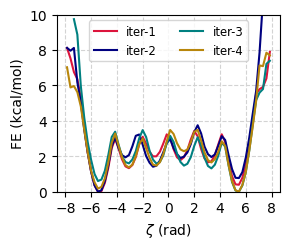

In [6]:
fig, axs = plt.subplots(1, 1, figsize=(3,2.6))

axs.set_xlabel("$\zeta$ (rad)")
axs.set_ylabel("FE (kcal/mol)")
axs.set_xticks(np.arange(-8,10,2))

"""
hist_ref, edges = np.histogram(zeta_ref, range=[-8,8], bins=60, density=True)
bins = (edges[1:]+edges[:-1])/2.0
fe_ref = -kt*np.log(hist_ref)
fe_ref -= fe_ref.min()
axs.plot(bins, fe_ref, ls="--", color="grey", label="4.5us MD", lw=1.0)

"""
axs.set_ylim(0,10)
axs.grid(axis='both', which='major', linestyle='--', color='lightgrey')
for i in range(num_itr):
    hist = np.histogram(zeta_data[:,i], range=[-8,8], bins=60, density=True, weights=wgts_data[:,i])[0]
    fe = -kt*np.log(hist)
    fe -= fe.min()
    axs.plot(bins, fe, color=colors[i], label="iter-%d"%(i+1), lw=1.5)
axs.legend(fontsize="small", ncol=2)

fig.tight_layout()

# save 
plt.savefig("fe_vs_zeta_convg.pdf", format="pdf")

### SI figure : Aib$_9$ : LDA vs. Time 

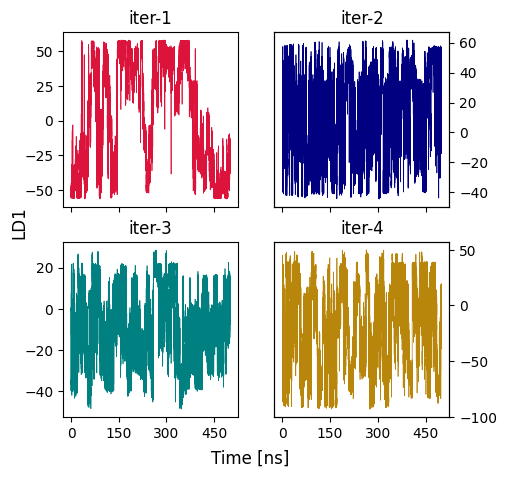

In [7]:
# make the ld1 vs. time plot
fig, axs = plt.subplots(2, 2, figsize=(5,5), sharex=True)
axs = axs.reshape([-1])

axs[0].set_xticks(np.arange(0,600, 150))
for i in range(num_itr):
    axs[i].set_title("iter-%d"%(i+1))
    
    if i ==0 or i == 2:
        axs[i].set_box_aspect(1)
        axs[i].plot(time, ld1_data[:,i], color=colors[i], lw=0.5, alpha=1)
    else:
        axs[i].set_yticks([])
        inv_ax = axs[i].twinx()
        inv_ax.set_box_aspect(1)
        inv_ax.plot(time, ld1_data[:,i], color=colors[i], lw=0.5, alpha=1)
    
fig.supxlabel("Time [ns]")
fig.supylabel("LD1")
#fig.subplots_adjust(wspace=0.0, hspace= 0.2, bottom=0.13, right=0.89, left=0.13, top=0.94)
#fig.tight_layout()

# save
plt.savefig("ld1_vs_time.pdf", format="pdf")

### SI figure : Aib$_9$ : FES vs. LD1

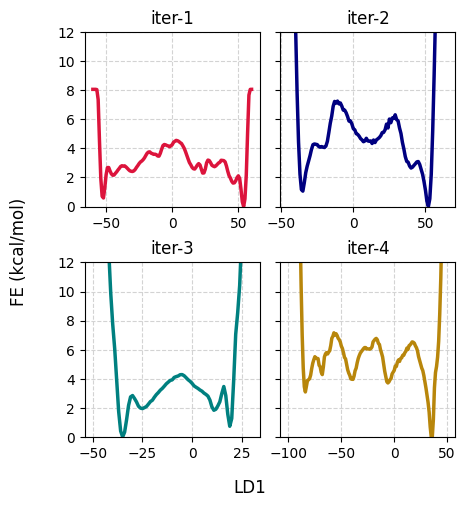

In [8]:
# make the FE vs. LD1 plot
fig, axs = plt.subplots(2, 2, figsize=(5,5), sharey=True)
axs = axs.reshape([-1])

axs[0].set_ylim(0,12)


for i in range(num_itr):
    axs[i].set_box_aspect(1)
    axs[i].set_title("iter-%d"%(i+1))
    axs[i].grid(axis='both', which='major', linestyle="--", color='lightgrey')
    axs[i].plot(ld1_fes_data[i][:,0], ld1_fes_data[i][:,1], color=colors[i], lw=2.5, alpha=1.0)
    
fig.supylabel("FE (kcal/mol)")
fig.supxlabel("LD1")
fig.subplots_adjust(wspace=-0.2, hspace= 0.32, bottom=0.13, right=0.98, left=0.10, top=0.94)
#fig.tight_layout()

# save
plt.savefig("fes_vs_ld1.pdf", format="pdf")

In [9]:
def plot_log_likelihood_with_dd(axis,cluster_array,train_log_lik,valid_log_lik,fontsize=16,xlabel=True,ylabel1=True,ylabel2=True, legend=True):
    """
    Plot log likelihood as a function of number of clusters for both training and cross validation.  These will be computed as the average over provided training sets.  Also compute and plot the second derivative of the training set data.
    Inputs:
        axis                    (required)  : matplotlib axis object
        cluster_array           (required)  : (n_clusters) int numpy array of number of clusters (x-values for this plot)
        train_log_lik           (required)  : (n_clusters, n_training_sets) float numpy array of log likelihood for training sets
        valid_log_lik           (required)  : (n_clusters, n_training_sets) float numpy array of log likelihood for CV sets
        fontsize                (optional)  : int defining fontsize to be used in the ploat, default is 16
        xlabel                  (optional)  : boolean defining whether or not to put an xlabel, default is True
        ylabel1                 (optional)  : boolean defining whether or not to put a left ylabel, default is True
        ylabel2                 (optional)  : boolean defining whether or not to put a right ylabel, default is True
        legend                  (optional)  : boolean defining whether or not to put a legend
    """
    colors = ["red", "blue", "black"]
    # Training Data
    train_mean = np.mean(train_log_lik,axis=1)
    train_std = np.std(train_log_lik,axis=1)
    axis.errorbar(cluster_array,train_mean,train_std,fmt='-o',lw=1,capsize=1,c=colors[0],label="Train")
    # Validation
    valid_mean = np.mean(valid_log_lik,axis=1)
    valid_std = np.std(valid_log_lik,axis=1)
    axis.errorbar(cluster_array,valid_mean,valid_std,fmt='--x',lw=1,capsize=1,c=colors[1],label="Cv")
    # Second derivative
    ax2 = axis.twinx()
    ax2.set_box_aspect(1)
    n_samples = train_log_lik.shape[1]
    n_clusters = train_log_lik.shape[0]
    dd = np.empty(train_log_lik.shape)
    for sample in range(n_samples):
        dd[:,sample] = np.gradient(np.gradient(train_log_lik[:,sample]))
    dd_mean = np.mean(dd,axis=1)
    dd_std = np.std(dd,axis=1)
    ax2.errorbar(cluster_array,dd_mean,dd_std,fmt='-^',lw=1,capsize=1,alpha=0.75,c=colors[2])
    #
    axis.grid(which='major', axis='both', color='#808080', linestyle='--')
    if ylabel1==True:
        axis.set_ylabel("LL per Frame",fontsize=fontsize)
    if ylabel2==True:
        ax2.set_ylabel("2$^{nd}$ derivative",fontsize=fontsize,color=colors[2])
    if xlabel==True:
        axis.set_xticks(cluster_array)
        axis.set_xlabel("Number of Clusters",fontsize=fontsize)
    ax2.tick_params(axis='both',labelsize=fontsize,labelcolor=colors[2])
    axis.tick_params(axis='both',labelsize=fontsize)
    if legend==True:
        axis.legend(fontsize="small", loc="lower right")

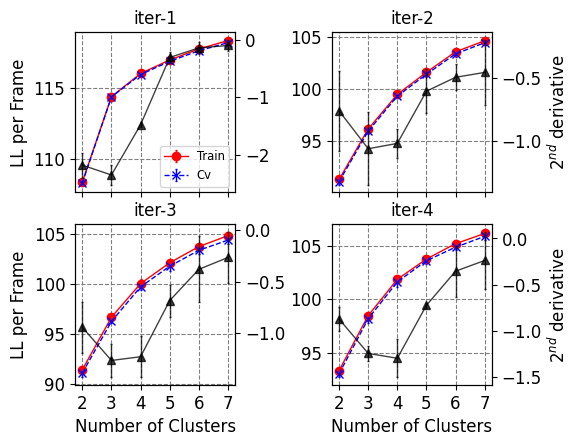

In [10]:
cluster_array = np.arange(2,8)

fig, axs = plt.subplots(2, 2, sharex=True, sharey=False, figsize=(6,4.7))
axs = axs.reshape([-1])

for i in range(num_itr):
    axs[i].set_box_aspect(1)
    axs[i].set_title("iter-%d"%(i+1))
    path = "itr_%d"%(i+1)
    train = np.loadtxt(path+"/train.dat")[:,1:]
    cv = np.loadtxt(path+"/cv.dat")[:,1:]
    if i == 0 :
        plot_log_likelihood_with_dd(axs[i], cluster_array, train, cv, fontsize=12, ylabel1=True, ylabel2=False, xlabel=False, legend=True)
    elif i == 1:
        plot_log_likelihood_with_dd(axs[i], cluster_array, train, cv, fontsize=12, ylabel1=False, ylabel2=True, xlabel=False, legend=False)
    elif i == 2:
        plot_log_likelihood_with_dd(axs[i], cluster_array, train, cv, fontsize=12, ylabel1=True, ylabel2=False, xlabel=True, legend=False)
    elif i == 3:
        plot_log_likelihood_with_dd(axs[i], cluster_array, train, cv, fontsize=12, ylabel1=False, ylabel2=True, xlabel=True, legend=False)

fig.subplots_adjust(wspace=0.15, left=0.1, right=0.9, bottom=0.15, top=0.9)
#fig.tight_layout()

# save 
plt.savefig("train_curve_vertical_with_dd.pdf", format="pdf")

### SI figure : Aib$_9$ : LDA coefficients

In [11]:
# load all the LD1 coefficients data 
ld1_coeff_data = np.empty([69, num_itr])

for i in range(num_itr):
    path = "itr_%d"%(i+1)
    if i == 0:
        ld1_coeff_data[:,i] = np.loadtxt(path+"/ld1_scalings.txt")
    elif i == 3:
        ld1_coeff_data[:,i] = np.loadtxt(path+"/ld1_4states_scalings.txt")
    else:
        ld1_coeff_data[:,i] = np.loadtxt(path+"/ld1_3states_scalings.txt")

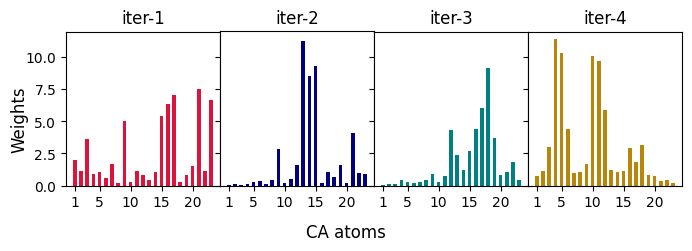

In [12]:
fig, axs = plt.subplots(1, num_itr, figsize=(7,2.5), sharex=True, sharey=True)
fig.supxlabel("CA atoms")
fig.supylabel("Weights")

for i in range(num_itr):
    vals = np.sqrt(np.sum(np.square(ld1_coeff_data[:,i].reshape(23,3)), axis=1))
    axs[i].set_box_aspect(1)
    axs[i].set_title("iter-%d"%(i+1))
    axs[i].set_xticks([1,5,10,15,20])
    axs[i].bar(np.arange(23)+1, vals, width=0.6, color=colors[i], align='center')
    
#fig.subplots_adjust(wspace=0, bottom=0.21, right=0.98, left=0.08, top=0.88)
fig.subplots_adjust(wspace=0.0, bottom=0.1, right=0.98, left=0.10, top=0.98)

# save
plt.savefig("lda_coeffs_aib9.pdf", format="pdf")

### load data from extended 1.5 $\mu$s simulations 

In [13]:
sim_time = 1500001  # in ps (fixed for each simulation)
time = np.arange(sim_time)*1e-3 # in ns

In [14]:
# load colvar data 

# initialize 
zeta_data_long = np.empty([sim_time, num_itr])
ld1_data_long = np.empty([sim_time, num_itr])
rbias_data_long = np.empty([sim_time, num_itr])
ld1_fes_data_long = []

for i in range(num_itr):
    path = "itr_%d"%(i+1)
    zeta_data_long[:,i] = np.loadtxt(path+"/concat_zeta.txt")
    ld1_data_long[:,i], rbias_data_long[:,i] = np.loadtxt(path+"/COLVAR_1.5us", usecols=(1,3), unpack=True)
    ld1_fes_long = np.loadtxt(path+"/fe_vs_ld1_1.5us.txt", usecols=(0,1))
    ld1_fes_data_long.append(ld1_fes_long)
    
wgts_data_long = np.exp(rbias_data_long/kt)

In [15]:
print(zeta_data_long.shape)
print(rbias_data_long.shape)
print(ld1_data_long.shape)

(1500001, 4)
(1500001, 4)
(1500001, 4)


### SI figure : Aib$_9$ : $\zeta$ vs. time (1.5$\mu$s long simulations) 

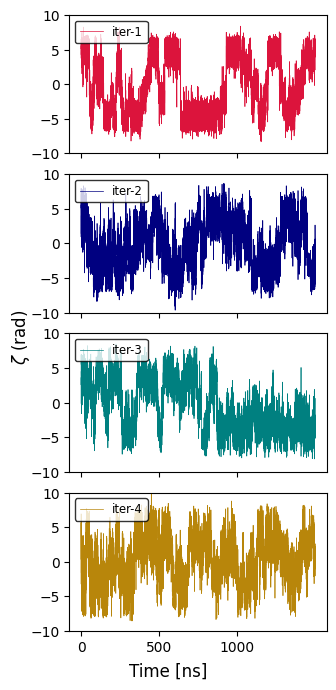

In [16]:
fig, axs = plt.subplots(4, 1, figsize=(3.3,7), sharex=True, sharey=True)
axs = axs.reshape([-1])

# 1st row 
axs[0].set_xticks(np.arange(0,1500, 500))
axs[0].set_yticks(np.arange(-10, 15, 5))
axs[0].set_ylim(-10,10)

for i in range(num_itr):
    #axs[i].set_box_aspect(1)
    #axs[i].set_title("iter-%d"%(i+1))
    axs[i].plot(time, zeta_data_long[:,i], color=colors[i], lw=0.5, alpha=1, label="iter-%d"%(i+1))
    axs[i].legend(fontsize='small', loc='upper left', edgecolor='k')
    
fig.supxlabel("Time [ns]")
fig.supylabel("$\zeta$ (rad)")
fig.subplots_adjust(wspace=0.0, hspace=0.15, bottom=0.08, right=0.98, left=0.20, top=0.96)

# save
plt.savefig("zeta_vs_time_1.5us.pdf", format="pdf")

### SI figure : Aib$_9$ : FES vs. $\zeta$ (1.5$\mu$s long simulations) 

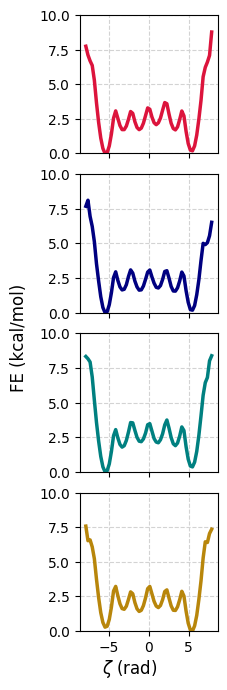

In [17]:
fig, axs = plt.subplots(num_itr, 1, figsize=(2.5,7), sharex=True, sharey=True)

fig.supxlabel("$\zeta$ (rad)")
fig.supylabel("FE (kcal/mol)")

axs[0].set_xticks([-5,0,5])
axs[0].set_ylim(0,10)

for i in range(num_itr):
    # histogram 
    hist, edges = np.histogram(zeta_data_long[:,i], range=[-8,8], bins=60, density=True, weights=wgts_data_long[:,i])
    bins = (edges[1:]+edges[:-1])/2
    fe = -kt*np.log(hist)
    fe -= fe.min()
    
    axs[i].set_box_aspect(1)
    axs[i].grid(axis='both', which='major', linestyle='--', color='lightgrey')
    axs[i].plot(bins, fe, color=colors[i], label="iter-%d"%(i+1), lw=2.5, alpha=1)

fig.subplots_adjust(wspace=0.0, hspace=0.15, bottom=0.08, right=1.0, left=0.15, top=0.96)

# save
plt.savefig("fe_vs_zeta_1.5us.pdf", format="pdf")

### convergence of FES along $\zeta$ from long simulations 

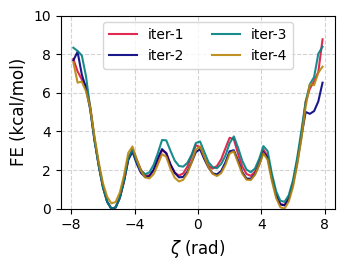

In [50]:
fig, ax = plt.subplots(1, 1, figsize=(3.25,2.5), sharex=True, sharey=True)

ax.set_xlabel("$\zeta$ (rad)", fontsize=12)
ax.set_ylabel("FE (kcal/mol)", fontsize=12)
ax.set_xticks([-8,-4,0,4,8])
#ax.set_xticks([-5,0,5])
ax.set_ylim(0,10)
ax.grid(axis='both', which='major', linestyle='--', color='lightgrey')

for i in range(num_itr):
    # histogram 
    hist, edges = np.histogram(zeta_data_long[:,i], range=[-8,8], bins=60, density=True, weights=wgts_data_long[:,i])
    bins = (edges[1:]+edges[:-1])/2
    fe = -kt*np.log(hist)
    fe -= fe.min()
    ax.plot(bins, fe, color=colors[i], label="iter-%d"%(i+1), lw=1.5, alpha=0.9)

    ax.legend(ncol=2)
fig.tight_layout(pad=0)

# save
plt.savefig("fes_vs_zeta_convg_1.5us.pdf", format="pdf")

### SI figure : Aib$_9$ : LDA vs. time (1$\mu$s long simulations) 

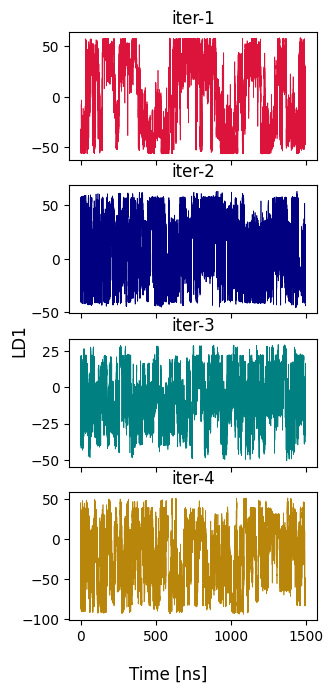

In [18]:
# make the ld1 vs. time plot
fig, axs = plt.subplots(4, 1, figsize=(3.3,7), sharex=True)
axs = axs.reshape([-1])

#axs[0].set_xticks(np.arange(0,600, 150))

for i in range(num_itr):
    axs[i].set_title("iter-%d"%(i+1))
    axs[i].plot(time, ld1_data_long[:,i], color=colors[i], lw=0.5, alpha=1)

fig.supxlabel("Time [ns]")
fig.supylabel("LD1")
fig.subplots_adjust(wspace=0.0, hspace= 0.2, bottom=0.1, right=0.95, left=0.20, top=0.94)
#ig.tight_layout()

# save
plt.savefig("ld1_vs_time_1.5us.pdf", format="pdf")

### SI figure : Aib$_9$ : FES vs. LD1 (1$\mu$s long simulations)

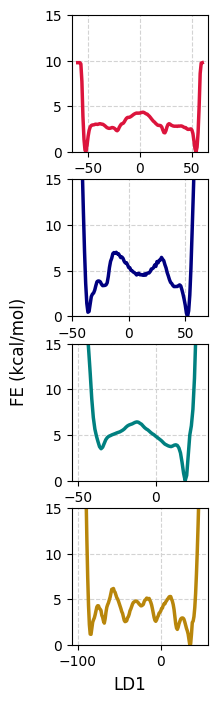

In [19]:
# make the FE vs. LD1 plot
fig, axs = plt.subplots(4, 1, figsize=(2.5,7), sharey=True)
axs = axs.reshape([-1])

axs[0].set_ylim(0,15)


for i in range(num_itr):
    axs[i].set_box_aspect(1)
    #axs[i].set_title("iter-%d"%(i+1))
    axs[i].grid(axis='both', which='major', linestyle="--", color='lightgrey')
    axs[i].plot(ld1_fes_data_long[i][:,0], ld1_fes_data_long[i][:,1], color=colors[i], lw=2.5, alpha=1.0)
    
fig.supylabel("FE (kcal/mol)")
fig.supxlabel("LD1")
fig.subplots_adjust(hspace= 0.2, bottom=0.08, right=0.98, top=0.98, left=0.1)
#fig.tight_layout()

# save
plt.savefig("fes_vs_ld1_1.5us.pdf", format="pdf")

### SI figure :  Aib$_9$ : Bhattacharyya Distance 

In [20]:
logb_dist_data = []
for i in range(3):
    x = np.loadtxt('itr_%d/logb-dist.txt'%(i+2))
    logb_dist_data.append(x)
print(logb_dist_data)

[array([[6.33119214, 0.733879  ],
       [1.15550474, 5.8542002 ],
       [2.46327672, 2.30562821]]), array([[ 6.65071679, -0.02188982],
       [ 2.33552179,  2.26294469],
       [ 1.38323648,  5.198488  ]]), array([[-0.93623784,  6.92198278],
       [ 2.09189178,  2.41459771],
       [ 7.0769303 , -3.37394573],
       [ 2.27252267,  2.41291336]])]


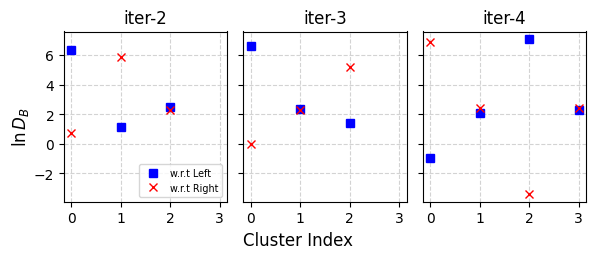

In [21]:
fig, axs = plt.subplots(1, 3, figsize=(6,2.5), sharey=True, sharex=True)
fig.supxlabel('Cluster Index')
fig.supylabel('$\ln{D_B}$')

for i in range(3):
    #axs[i].set_aspect(1)
    axs[i].set_title('iter-%d'%(i+2))
    axs[i].grid(axis='both', which='major', linestyle='--', color='lightgrey')
    axs[i].set_xticks(np.arange(4))
    for j in range(logb_dist_data[i].shape[0]):
        if i ==0 and j ==0:
            axs[i].plot(j, logb_dist_data[i][j,0], 's', color='b', ms=6, label='w.r.t Left')
            axs[i].plot(j, logb_dist_data[i][j,1], 'x', color='r', ms=6, label='w.r.t Right')
        else:
            axs[i].plot(j, logb_dist_data[i][j,0], 's', color='b', ms=6)
            axs[i].plot(j, logb_dist_data[i][j,1], 'x', color='r', ms=6)
    if i ==0 :      
        axs[i].legend(fontsize='x-small', loc='lower right')

fig.subplots_adjust(wspace=0.1, bottom=0.2, right=0.98, top=0.88, left=0.11)
#fig.tight_layout()

# save 
plt.savefig('logb_dist_aib9.pdf', format='pdf')

### SI figure: Aib$_9$ : Equal Weights case

In [22]:
t, l, b = np.loadtxt('../iter-1/run_metad_with_new_coords/equal_wgts/COLVAR', usecols=(0,1,3), unpack=True)
z = np.loadtxt('../iter-1/run_metad_with_new_coords/equal_wgts/analysis/zeta.txt')

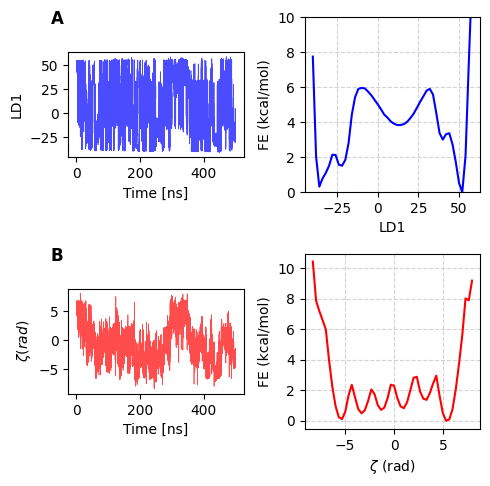

In [23]:
fig, axs =plt.subplots(2, 2, figsize=(5,5))
axs = axs.reshape([-1])

#0
axs[0].text(-0.1, 1.4, st.ascii_uppercase[0],transform=axs[0].transAxes, fontsize=12, fontweight='bold', va='top')
axs[0].set_box_aspect(0.6)
axs[0].set_yticks([-50,-25,0,25,50])
axs[0].set_xlabel('Time [ns]')
axs[0].set_ylabel('LD1')
axs[0].plot(t*1e-3, l, 'b-', lw=0.5, alpha=0.7)

#1
axs[1].set_box_aspect(1)
axs[1].set_ylim(0,10)
h,e = np.histogram(l, bins=50, density=True, weights=np.exp(b/kt))
g = (e[1:]+e[:-1])/2
f =-kt*np.log(h)
f -= f.min()

axs[1].grid(axis='both', which='major', linestyle='--', color='lightgrey')
axs[1].set_xlabel('LD1')
axs[1].set_ylabel('FE (kcal/mol)')
axs[1].set_xticks([-50,-25,0,25,50])
axs[1].plot(g, f, 'b-', lw=1.5)



#2
axs[2].text(-0.1, 1.4, st.ascii_uppercase[1], fontsize=12, fontweight='bold', va='top', transform=axs[2].transAxes)
axs[2].set_box_aspect(0.6)
axs[2].set_xlabel('Time [ns]')
axs[2].set_ylabel('$\zeta (rad)$')
axs[2].plot(t*1e-3, z, 'r-', lw=0.5, alpha=0.7)


#3
h,e = np.histogram(z, bins=50, density=True, weights=np.exp(b/kt))
g = (e[1:]+e[:-1])/2
f =-kt*np.log(h)
f -= f.min()

axs[3].grid(axis='both', which='major', linestyle='--', color='lightgrey')
axs[3].set_xlabel('$\zeta$ (rad)')
axs[3].set_ylabel('FE (kcal/mol)')
axs[3].plot(g, f, 'r-', lw=1.5)
axs[3].set_box_aspect(1)

fig.tight_layout()

plt.savefig('equal_wgts_summary_aib9.pdf', format='pdf')

In [24]:
print(kt)

0.794882
